***Лабораторная работа №2***

Работу выполнил Ширко Максим Андреевич, группа 2371.

Задание на лабораторную работу:
1. К текущему датасету необходимо добавить новый аттрибут.

2. "Причесать" датасет: удалить выбросы и дубли, обработать пропущенные значения, найти кривые данные.

3. Построить графики зависимости одной переменной от другой (plt.scatter), описать. Построить несколько разных графиков, найти группы.

4. Применить метод KMeans к вашему датасету.

5. Написать выводы.

---

## Основная часть: ##

In [69]:
import pandas as pd

# Загрузка набора данных
file_path = 'flavors_of_cacao.csv'
data = pd.read_csv(file_path)

# Отображение первых нескольких строк
data.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# 1 пункт #

Новым атрибутом будет рассчитываться возраст отзывов.

In [71]:
from datetime import datetime

# Определить текущий год
current_year = datetime.now().year

# Рассчитываем возраст отзыва и добавляем его в новый столбец «Review_Age»
data['Review_Age'] = current_year - data['Review\nDate']

# Отображение первых нескольких строк
data[['Review\nDate', 'Review_Age']].head()

,Review\nDate,Review_Age
0,2016,8
1,2015,9
2,2015,9
3,2015,9
4,2015,9


# 2 пункт #

Удаление дубликатов, строк из пробелов, а так же обработка пропущенных значений.

In [93]:
# Удаляем дубликаты
data = data.drop_duplicates()

# Убираем строки, содержащие только пробелы, заменяя их на NA
data.replace(' ', pd.NA, inplace=True)

# Проверка, нет ли пропущенных значений, и обработка
data = data.fillna("Unknown")

# 3 пункт #

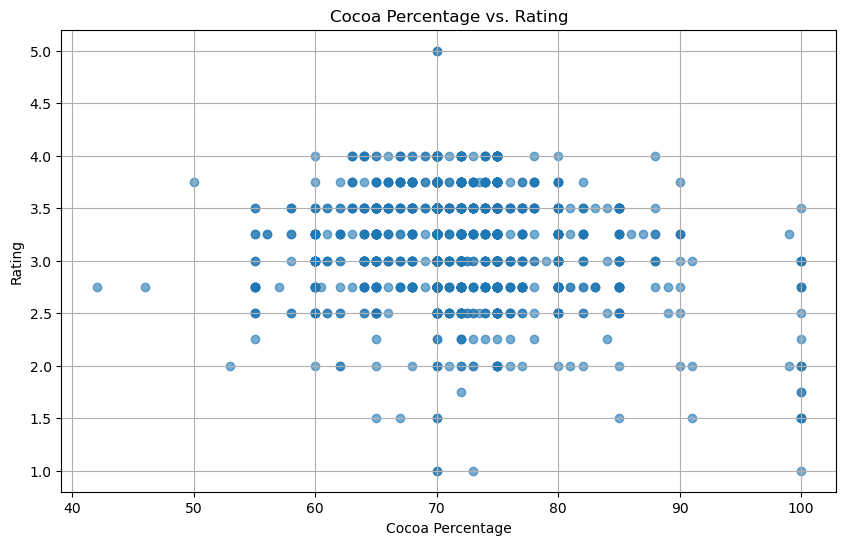

In [95]:
import matplotlib.pyplot as plt

# Преобразуем процент какао в числовой тип (удалив символ %)
data['Cocoa\nPercent'] = data['Cocoa\nPercent'].str.replace('%', '').astype(float)

# Зависимость процента какао от рейтинга
plt.figure(figsize=(10, 6))
plt.scatter(data['Cocoa\nPercent'], data['Rating'], alpha=0.6)
plt.title('Cocoa Percentage vs. Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

Выводы по графику зависимости:
- На графике распределения процента какао по рейтингу можно наблюдать, что высокая доля какао 80-85% часто ассоциируется с умеренно низкими рейтингами. Возможно, более высокий процент какао делает вкус шоколада слишком горьким для большинства потребителей.
- Примерно в диапазоне 60-80% какао наблюдается основной массив оценок, что указывает на популярность среди потребителей шоколада с таким содержанием какао.

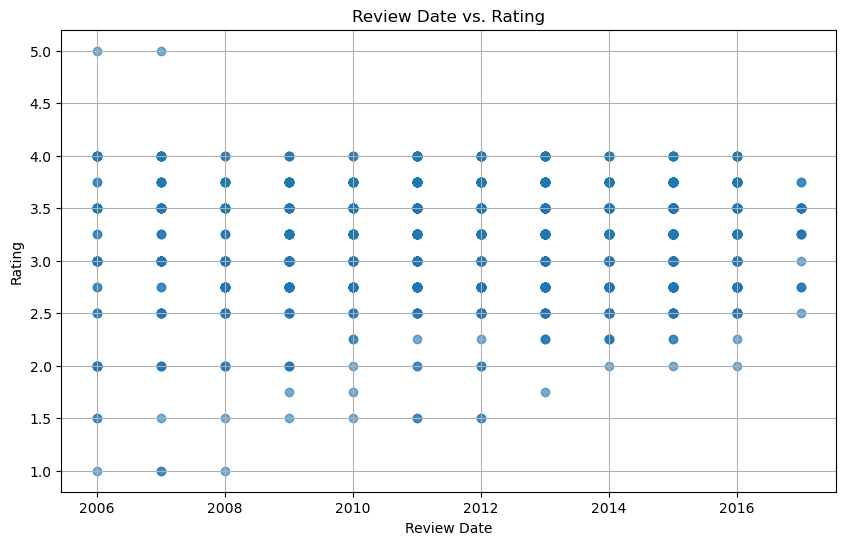

In [97]:
# Зависимость даты ревью от рейтинга
plt.figure(figsize=(10, 6))
plt.scatter(data['Review\nDate'], data['Rating'], alpha=0.6)
plt.title('Review Date vs. Rating')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

Выводы по графику зависимости:
- Временной график показал, что рейтинг шоколадок в целом оставался относительно стабильным по мере добавления новых ревью, однако в течении времени наблюдается повышение нижнего порога оценок с 2008 по 2016 года от 1 до 2.


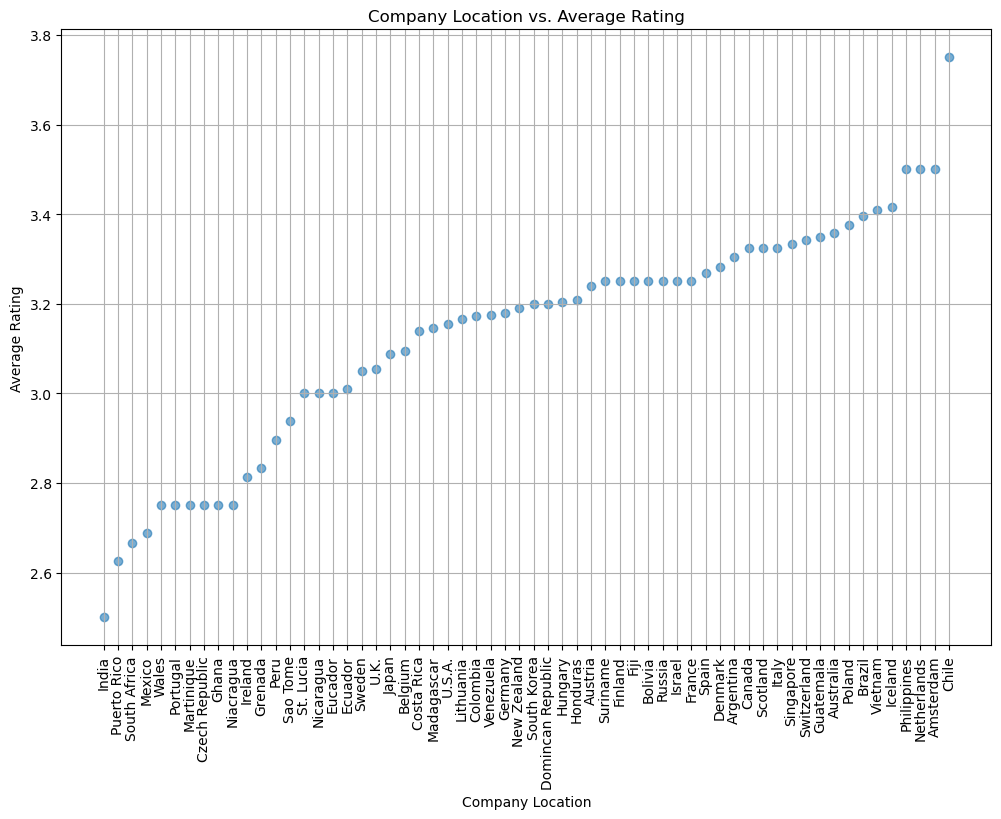

In [99]:
# Рассчет среднего рейтинга по местоположению компании
avg_rating_by_location = data.groupby('Company\nLocation')['Rating'].mean().reset_index()

# Сортировка данных по среднему рейтингу в порядке возрастания
avg_rating_by_location = avg_rating_by_location.sort_values(by='Rating', ascending=True)

# Зависимость местоположения компании от среднего рейтинга
plt.figure(figsize=(12, 8))
plt.scatter(avg_rating_by_location['Company\nLocation'], avg_rating_by_location['Rating'], alpha=0.6)
plt.title('Company Location vs. Average Rating')
plt.xlabel('Company Location')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

Выводы по графику зависимости:
- Распределение среднего рейтинга по странам показало, что качество оценок не зависит от континентов и сильно зависит от конкретных стран производителей.


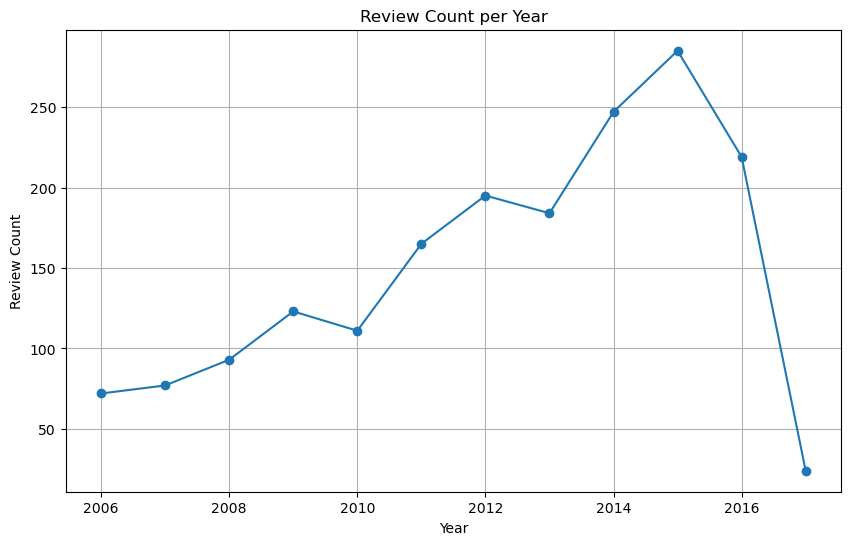

In [101]:
# Рассчет количества отзывов по годам
review_count_by_year = data['Review\nDate'].value_counts().sort_index()

# Зависимость количества ревью от дат
plt.figure(figsize=(10, 6))
plt.plot(review_count_by_year.index, review_count_by_year.values, marker='o')
plt.title('Review Count per Year')
plt.xlabel('Year')
plt.ylabel('Review Count')
plt.grid(True)
plt.show()

Выводы по графику зависимости:
- На графике количества ревью видно, что с 2010 года их число резко увеличивалось. Это может свидетельствовать о росте интереса к качеству и разнообразию шоколада среди потребителей.

# 4 пункт #

Для начала следует определится с оптимальным количеством кластеров для применения KMeans при помощи коэффициента силуэта кластера.

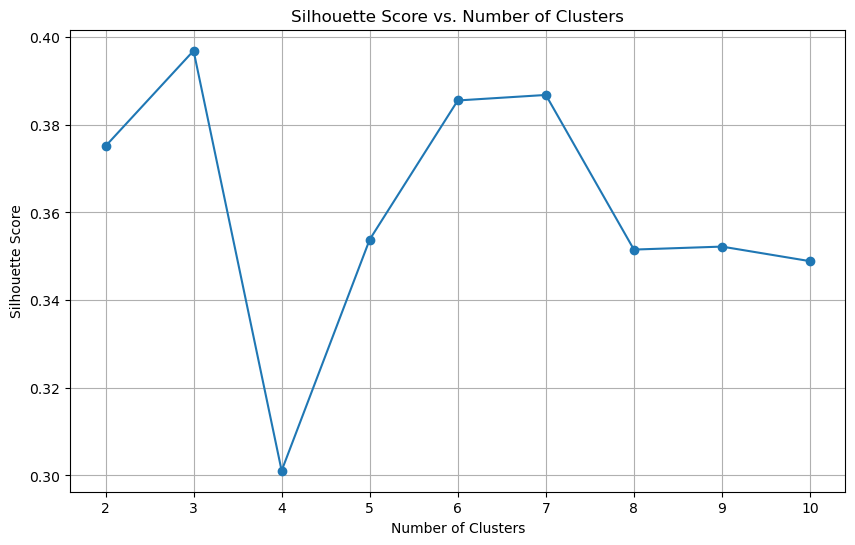

In [152]:
from sklearn.metrics import silhouette_score
import numpy as np

# Создадим данные для кластеризации
X = data[['Cocoa\nPercent', 'Rating']]

# Стандартизируем данные
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Определяем диапазон количества кластеров для оценки
cluster_range = range(2, 11)
silhouette_scores = []

# Рассчет значения силуэта для каждого количества кластеров
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Построим график оценки силуэтов для каждого количества кластеров
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

Больший коэфициент при 3 кластерах, следовательно для зависимости процента шоколада от рейтинга подойдет 3 кластера.

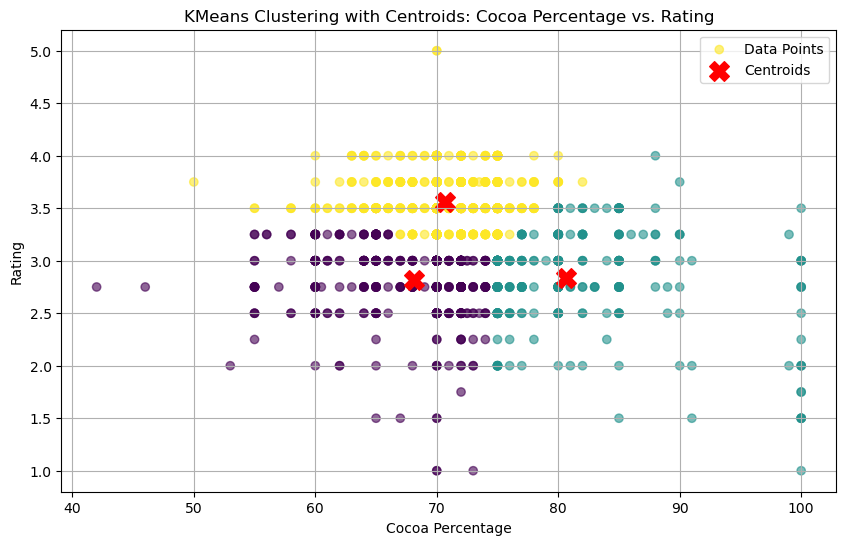

,Cocoa Percentage,Rating
0,68.125436,2.812282
1,80.659574,2.837386
2,70.692265,3.554933


In [109]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Сопоставляем KMeans с 3 кластерами
optimal_clusters = 3
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Optimal_Cluster'] = kmeans_optimal.fit_predict(X_scaled)

# Извлекаем центроиды кластеров
centroids = scaler.inverse_transform(kmeans_optimal.cluster_centers_)

# Класстеры для зависимости какао от рейтинга
plt.figure(figsize=(10, 6))
plt.scatter(data['Cocoa\nPercent'], data['Rating'], c=data['Optimal_Cluster'], cmap='viridis', alpha=0.6, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title('KMeans Clustering with Centroids: Cocoa Percentage vs. Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.show()

centroids_df = pd.DataFrame(centroids, columns=['Cocoa Percentage', 'Rating'])
centroids_df

Кластеризация выявила 3 основных группы:
- Пониженный рейтинг и содержание какао.
- Повышенный рейтинг с разнообразным процентом какао.
- Повышенный процент какао и пониженные рейтинги.

Можно сказать что потребитили разделились на две группы: любителей темного шоколада и нет. Однако так же можно выделить группу шоколада с повышенными, относительно основной массы, оценками, где не прослеживается зависимость от процента какао.

Вывод: в рамках лабороторной работы проведен кластерный анализ на основе данных о шоколаде, что позволило на практике познакомиться с основными этапами применения KMeans: выбор признаков для кластеризации, предобработка данных, определение оптимального количества кластеров с помощью коэффициента силуэта с последующей визуализацией результатов.
